## Data Cleaning

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
cookies = pd.read_csv('../Data/cookies.csv')

In [3]:
cookies.head(3)

sugar to flour ratio  sugar index  bake temp  chill time  calories  \
0                  0.25          9.5        300        15.0     136.0   
1                  0.23          3.3        520        34.0     113.0   
2                  0.18          1.9        360        33.0     106.0   

   density    pH  grams baking soda  bake time  quality butter type  weight  \
0  0.99367  8.10               0.44       12.1        8      melted    15.2   
1  0.99429  8.16               0.48        8.4        7      melted    12.4   
2  0.98746  8.21               0.83       14.0        9      melted     9.4   

   diameter           mixins  crunch factor  aesthetic appeal  
0         7          raisins           1.30                 3  
1         7          raisins           1.71                 3  
2         7  nuts, chocolate           1.78                 3

In [5]:
cookies.describe()

sugar to flour ratio  sugar index    bake temp   chill time  \
count           5198.000000  5193.000000  5198.000000  5198.000000   
mean               0.318049     5.402465   559.638322    30.390246   
std                0.150036     4.668342   353.274062    17.268403   
min                0.000000     0.600000    90.000000     0.000000   
25%                0.240000     1.800000   380.000000    17.000000   
50%                0.310000     3.000000   470.000000    29.000000   
75%                0.390000     8.000000   640.000000    41.000000   
max                3.000000    31.600000  6110.000000   146.500000   

          calories      density           pH  grams baking soda    bake time  \
count  5198.000000  5198.000000  5198.000000        5198.000000  5188.000000   
mean    115.015294     0.995819     8.222020           0.530864    10.494758   
std      56.506171     0.062193     0.283323           0.150886     1.194584   
min     -99.000000     0.987110     7.720000           0.220000     8.000000   
25%      76.000000     0.992300     8.110000           0.430000     9.500000   
50%     118.000000     0.994800     8.210000           0.505000    10.300000   
75%     155.000000     0.996908     8.320000           0.600000    11.300000   
max     366.500000     5.000000    25.000000           2.000000    14.900000   

           quality       weight  diameter  crunch factor  aesthetic appeal  
count  5198.000000  5198.000000    5198.0    5198.000000       5198.000000  
mean      7.325125    14.381935       7.0       1.499367          3.000577  
std       1.302780     3.023740       0.0       0.289205          0.024019  
min       3.000000   -99.000000       7.0       1.000000          3.000000  
25%       7.000000    12.800000       7.0       1.250000          3.000000  
50%       8.000000    14.000000       7.0       1.500000          3.000000  
75%       8.000000    15.400000       7.0       1.750000          3.000000  
max      11.000000    31.800000       7.0       2.000000          4.000000

## Missing Values

In [6]:
for col in cookies.columns:
    pct_missing = np.mean(cookies[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

sugar to flour ratio - 0%
sugar index - 0%
bake temp - 0%
chill time - 0%
calories - 0%
density - 0%
pH - 0%
grams baking soda - 0%
bake time - 0%
quality - 0%
butter type - 0%
weight - 0%
diameter - 0%
mixins - 0%
crunch factor - 0%
aesthetic appeal - 0%


In [7]:
num_rows = len(cookies.index)
low_information_cols = [] #

for col in cookies.columns:
    cnts = cookies[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.90:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

diameter: 100.00000%
7    5198
Name: diameter, dtype: int64

aesthetic appeal: 99.94229%
3    5195
4       3
Name: aesthetic appeal, dtype: int64



In [8]:
cookies.isnull().sum().sort_values(ascending=False)

bake time               10
sugar index              5
mixins                   2
aesthetic appeal         0
crunch factor            0
diameter                 0
weight                   0
butter type              0
quality                  0
grams baking soda        0
pH                       0
density                  0
calories                 0
chill time               0
bake temp                0
sugar to flour ratio     0
dtype: int64

In [9]:
'''
can drop missing values as there are not many compared to the lenght of the dataset
and they are not time series
'''

cookies.dropna(inplace=True)

In [10]:
cookies

sugar to flour ratio  sugar index  bake temp  chill time  calories  \
0                     0.25          9.5        300        15.0     136.0   
1                     0.23          3.3        520        34.0     113.0   
2                     0.18          1.9        360        33.0     106.0   
3                     0.18         10.5        490        41.0     124.0   
4                     0.24          2.4        770         6.0      33.0   
...                    ...          ...        ...         ...       ...   
5193                  0.66          2.0        390        15.0      88.0   
5194                  0.16          1.5        490        10.0      97.0   
5195                  0.25         14.3        480        79.0     149.0   
5196                  0.33          1.4        560        35.0     136.0   
5197                  0.44          1.8        810        28.0      68.0   

      density    pH  grams baking soda  bake time  quality butter type  \
0     0.99367  8.10               0.44       12.1        8      melted   
1     0.99429  8.16               0.48        8.4        7      melted   
2     0.98746  8.21               0.83       14.0        9      melted   
3     0.99630  8.14               0.35       10.5        7      melted   
4     0.99740  8.09               0.57        9.4        5       cubed   
...       ...   ...                ...        ...      ...         ...   
5193  0.99357  8.66               0.60       11.5        6       cubed   
5194  0.99170  8.48               0.44       10.7        8      melted   
5195  0.99750  8.12               0.37        9.7        7      melted   
5196  0.99380  8.63               0.78       10.3        8      melted   
5197  0.99501  8.36               0.66       11.2        5       cubed   

      weight  diameter                 mixins  crunch factor  aesthetic appeal  
0       15.2         7                raisins           1.30                 3  
1       12.4         7                raisins           1.71                 3  
2        9.4         7        nuts, chocolate           1.78                 3  
3       12.2         7              chocolate           1.59                 3  
4       19.8         7  nuts, oats, chocolate           1.30                 3  
...      ...       ...                    ...            ...               ...  
5193    11.6         7          peanut butter           1.36                 3  
5194    10.0         7                raisins           1.80                 3  
5195    13.4         7        chocolate, oats           1.07                 3  
5196    13.8         7              chocolate           1.77                 3  
5197    16.0         7              chocolate           1.61                 3  

[5181 rows x 16 columns]

## Correlations

In [11]:
X = cookies.drop(columns = 'quality')
y = cookies['quality']

X.corrwith(y)

sugar to flour ratio    0.179929
sugar index             0.219959
bake temp              -0.470895
chill time              0.364925
calories                0.440080
density                -0.017523
pH                     -0.113725
grams baking soda      -0.306251
bake time               0.315445
weight                 -0.328534
diameter                     NaN
crunch factor           0.008346
aesthetic appeal        0.000143
dtype: float64

In [12]:
cookies['diameter'].value_counts() #they are all of size 7 -> can drop

7    5181
Name: diameter, dtype: int64

In [13]:
cookies['aesthetic appeal'].value_counts() #almost all 3 and only 3 of 4 -> can drop

3    5178
4       3
Name: aesthetic appeal, dtype: int64

In [14]:
cookies.drop(['diameter', 'aesthetic appeal'], axis=1, inplace=True)

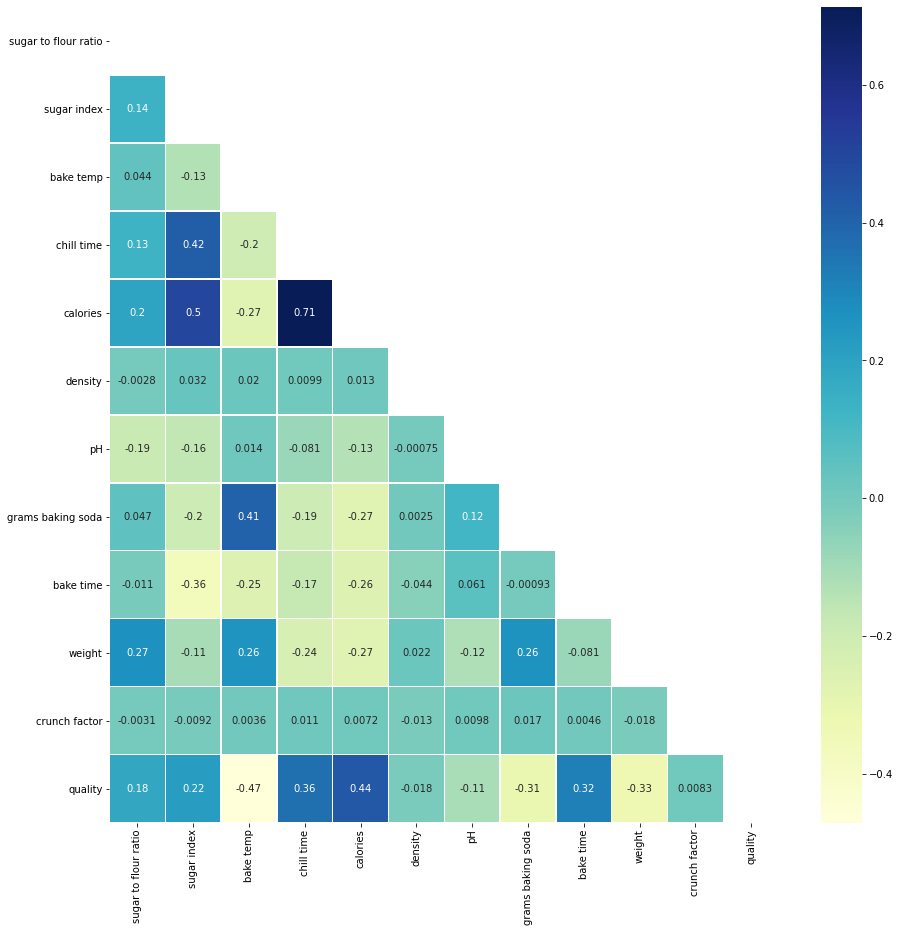

In [15]:
heatmap = cookies[['sugar to flour ratio', 'sugar index', 'bake temp', 'chill time',
       'calories', 'density', 'pH', 'grams baking soda', 'bake time', 'weight', 'crunch factor',
       'quality']]

c = heatmap.corr()
fig_dims = (15, 15)
mask = np.triu(np.ones_like(c, dtype=bool))
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(c, annot=True,ax = ax, mask=mask,cmap="YlGnBu", linewidths=.5)
plt.show()

In [16]:
'''
only keep correlation > 0.2?
First check outliers and if correlations increase:
'''

'\nonly keep correlation > 0.2?\nFirst check outliers and if correlations increase:\n'

## Outliers

In [17]:
# find outliers
import scipy.stats as stats
z_scores = stats.zscore(cookies.select_dtypes(['int64', 'float64']))
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
cookies = cookies[filtered_entries]

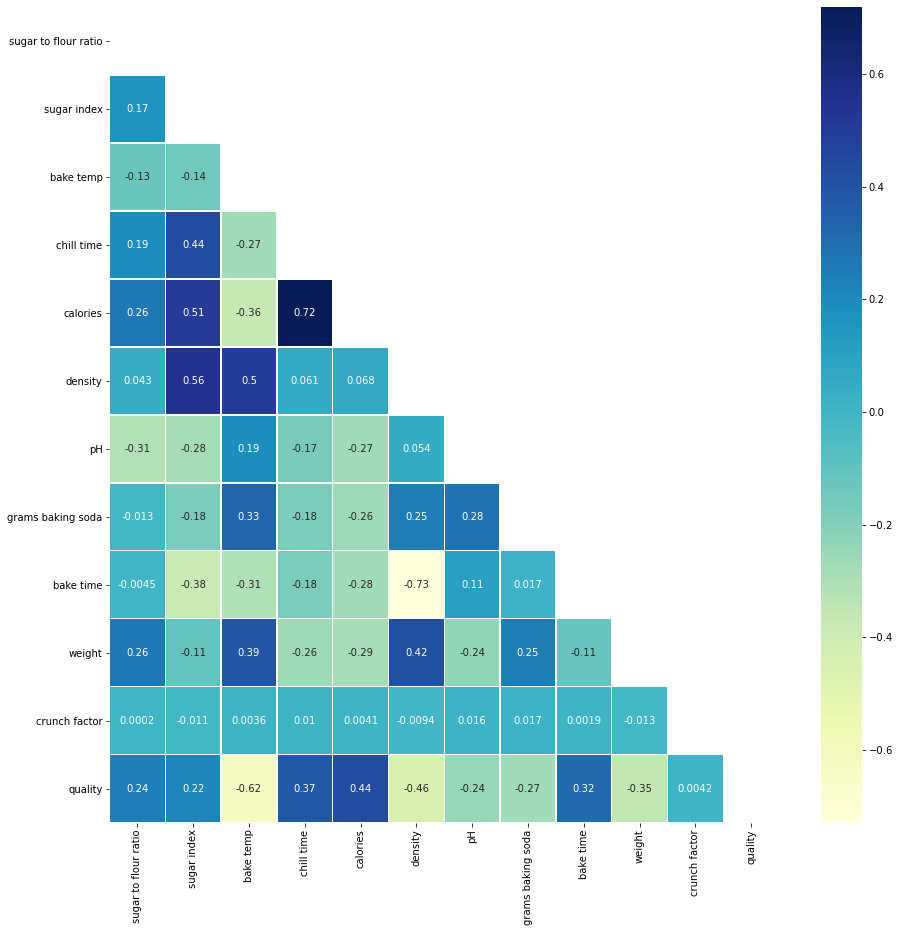

In [18]:
heatmap = cookies[['sugar to flour ratio', 'sugar index', 'bake temp', 'chill time',
       'calories', 'density', 'pH', 'grams baking soda', 'bake time', 'weight', 'crunch factor',
       'quality']]

c = heatmap.corr()
fig_dims = (15, 15)
mask = np.triu(np.ones_like(c, dtype=bool))
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(c, annot=True,ax = ax, mask=mask,cmap="YlGnBu", linewidths=.5)
plt.show()

In [19]:
''' 
only thing left to drop is crunch factor?
'''

cookies = cookies.drop('crunch factor', axis = 1)

## Creating Dummies 

In [20]:
cookies['butter type'].value_counts() #get dummies (melted 1/ cubes 0)

melted    3783
cubed     1122
Name: butter type, dtype: int64

In [21]:
cookies['butter type'] = cookies['butter type'].replace('melted', 1).replace('cubed', 0)

In [22]:
cookies['mixins'].value_counts() # 2 ways: 1) Others 2) all

chocolate                         1807
raisins                           1130
chocolate, oats                    736
nuts, chocolate                    470
nuts,raisins                       314
nuts, oats, chocolate              262
nuts, oats                          98
chocolate, peanut butter            46
raisins, oats                       23
peanut butter                       13
oats                                 4
chocolate, oats, peanut butter       2
Name: mixins, dtype: int64

In [23]:
mixins_list = ['chocolate', 'raisins', 'oats', 'nuts', 'peanut butter']

for x in mixins_list:
    cookies[x] = 0
    cookies[x] = cookies['mixins'].str.contains(x).astype(int)
    
cookies.drop('mixins', axis=1, inplace=True)
cookies.head(3)

sugar to flour ratio  sugar index  bake temp  chill time  calories  \
0                  0.25          9.5        300        15.0     136.0   
1                  0.23          3.3        520        34.0     113.0   
2                  0.18          1.9        360        33.0     106.0   

   density    pH  grams baking soda  bake time  quality  butter type  weight  \
0  0.99367  8.10               0.44       12.1        8            1    15.2   
1  0.99429  8.16               0.48        8.4        7            1    12.4   
2  0.98746  8.21               0.83       14.0        9            1     9.4   

   chocolate  raisins  oats  nuts  peanut butter  
0          0        1     0     0              0  
1          0        1     0     0              0  
2          1        0     0     1              0

## Saving Data 

**Complete Dataset**

In [25]:
cookies.to_csv('../Data/cookies_lisa_test.csv')

**Strict Correlation Data set (corr > 0.3)**

In [26]:
cookies_strict = cookies[['quality', 'bake temp', 'chill time', 'calories', 'density', 'bake time', 
                          'weight', 'butter type', 'chocolate', 'raisins', 'oats', 'nuts', 'peanut butter']]
cookies_strict.to_csv('../Data/cookies_strict.csv')

In [30]:
# without dummies
cookies_strict_2 = cookies[['quality', 'bake temp', 'chill time', 'calories', 'density', 'bake time', 
                          'weight']]
cookies_strict_2.to_csv('../Data/cookies_strict_2.csv')

In [31]:
cookies

sugar to flour ratio  sugar index  bake temp  chill time  calories  \
0                     0.25          9.5        300        15.0     136.0   
1                     0.23          3.3        520        34.0     113.0   
2                     0.18          1.9        360        33.0     106.0   
3                     0.18         10.5        490        41.0     124.0   
4                     0.24          2.4        770         6.0      33.0   
...                    ...          ...        ...         ...       ...   
5193                  0.66          2.0        390        15.0      88.0   
5194                  0.16          1.5        490        10.0      97.0   
5195                  0.25         14.3        480        79.0     149.0   
5196                  0.33          1.4        560        35.0     136.0   
5197                  0.44          1.8        810        28.0      68.0   

      density    pH  grams baking soda  bake time  quality  butter type  \
0     0.99367  8.10               0.44       12.1        8            1   
1     0.99429  8.16               0.48        8.4        7            1   
2     0.98746  8.21               0.83       14.0        9            1   
3     0.99630  8.14               0.35       10.5        7            1   
4     0.99740  8.09               0.57        9.4        5            0   
...       ...   ...                ...        ...      ...          ...   
5193  0.99357  8.66               0.60       11.5        6            0   
5194  0.99170  8.48               0.44       10.7        8            1   
5195  0.99750  8.12               0.37        9.7        7            1   
5196  0.99380  8.63               0.78       10.3        8            1   
5197  0.99501  8.36               0.66       11.2        5            0   

      weight  chocolate  raisins  oats  nuts  peanut butter  
0       15.2          0        1     0     0              0  
1       12.4          0        1     0     0              0  
2        9.4          1        0     0     1              0  
3       12.2          1        0     0     0              0  
4       19.8          1        0     1     1              0  
...      ...        ...      ...   ...   ...            ...  
5193    11.6          0        0     0     0              1  
5194    10.0          0        1     0     0              0  
5195    13.4          1        0     1     0              0  
5196    13.8          1        0     0     0              0  
5197    16.0          1        0     0     0              0  

[4905 rows x 17 columns]